# Intel Image Classififcation using SVM

#### The given dataset has different types of scenes as below

1. Buildings
2. Forest
3. Glacier
4. Mountain
5. Sea
6. Street


#### Below are the steps i had followed for to train & test the model.

1. Import the necesasary libraties and image files
2. Create a Linear SVM model and train it
3. Check the accuracy score of the model
4. Predict some random images
5. Improve the model using PCA

### 1. Import the necesassary libraries and  image files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder

Import the Training & test images 

In [2]:
# The training data set is in the /Users/macos/Documents/Intel Image Classification/seg_train
trn_img_path = "../input/seg_train/seg_train/"

# The testing data set is in the /Users/macos/Documents/Intel Image Classification/seg_test
tst_img_path = "../input/seg_test/seg_test/"

# Lets create 2 set of arrays for train & testing data's. One for to store the Image data and anther one for label details
X_train =[] # Stores the training image hog data
label_train = [] # Stores the training image label

X_test = [] # Stores the testing image hog data
label_test = [] # Stores the testing image label

scene_label=['Buildings','Forest', 'Glacier','Mountain','Sea','Street']

#### "hog_data_extractor" function will get the hog feature from the given jpeg file

In [3]:

def hog_data_extractor(jpeg_path):
    jpeg_data = cv2.imread(jpeg_path)
    jpeg_data=cv2.resize(jpeg_data,(150,150)) 
    hog_data = feature.hog(jpeg_data)/255.0
    return hog_data

#### "jpeg_to_array" function will loades the images from the given path and stores the hog features in to X_train_data & X_test_data respectively

In [4]:
def jpeg_to_array (scene_type, img_root_path,data_type):
    scene_path = os.path.join(img_root_path,scene_type.lower())
    print('Loading ' + data_type +' images for scene type '+scene_type)
    for img in os.listdir(scene_path):
        img_path = os.path.join(scene_path,img)
        if img_path.endswith('.jpg'):
            if(data_type == 'Training'):
                X_train.append(hog_data_extractor(img_path))
                label_train.append(str(scene_type))
            if(data_type =='Testing'):
                X_test.append(hog_data_extractor(img_path))
                label_test.append(np.array(str(scene_type)))

Call the "jpeg_to_array" function to load the training & test images

In [5]:
[jpeg_to_array(scene,trn_img_path,'Training')for scene in scene_label]
len(X_train)
[jpeg_to_array(scene,tst_img_path,'Testing')for scene in scene_label]
len(X_test)

Loading Training images for scene type Buildings
Loading Training images for scene type Forest
Loading Training images for scene type Glacier
Loading Training images for scene type Mountain
Loading Training images for scene type Sea
Loading Training images for scene type Street
Loading Testing images for scene type Buildings
Loading Testing images for scene type Forest
Loading Testing images for scene type Glacier
Loading Testing images for scene type Mountain
Loading Testing images for scene type Sea
Loading Testing images for scene type Street


3000

#### Using Label Encoder to encode the scene labels

In [6]:
le = LabelEncoder()
y_train = le.fit_transform(label_train)
y_test = le.fit_transform(label_test)

### Create a Linear SVM model and train it

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC

In [8]:
lsvc = LinearSVC(random_state=0,tol=1e-5)
lsvc.fit(X_train,y_train)
print('Coef',lsvc.coef_)
print('Intercept',lsvc.intercept_)

Coef [[-0.16805816 -0.04361006  0.15721175 ... -0.46156704 -0.22508177
   0.29750603]
 [ 0.75465047  0.58937183  0.31291474 ...  0.22079044  0.2759461
   0.16811901]
 [-0.38637642 -0.13848326  0.04253841 ... -0.08389304 -0.13699858
  -0.24620962]
 [-0.26749283 -0.11579541 -0.02870476 ...  0.13074316  0.14288126
   0.0815845 ]
 [-0.17432504 -0.03665766  0.01596754 ...  0.03616566 -0.02320052
  -0.07716832]
 [ 0.22684442 -0.25082849 -0.47674414 ...  0.17586591 -0.03847323
  -0.25366894]]
Intercept [-0.07290886 -1.75917551 -0.75497179 -0.74205845 -0.74151831 -0.20699053]


####  Score and Cross Value result of the model

In [9]:
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
lsvc_score = lsvc.score(X_test,y_test)
print('Score', lsvc_score)
kfold = KFold(n_splits=10, random_state=9)
cv_results = cross_val_score(lsvc , X_train, y_train, cv=kfold, scoring="accuracy")
print(cv_results)

Score 0.6403333333333333
[0.         0.41096866 0.00071225 0.16524217 0.05844619 0.
 0.24946543 0.00285103 0.24946543 0.00427655]


In [10]:
print(cv_results.mean(), cv_results.std())

0.11414277098525138 0.1392204639615346


#### Predict the scene classification for some random image

In [11]:
def scene_predict(img_path):
    image = cv2.imread(img_path)
    ip_image = Image.open(img_path)
    image = cv2.resize(image,(150,150))
    prd_image_data = hog_data_extractor(img_path)
    scene_predicted = lsvc.predict(prd_image_data.reshape(1, -1))[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(ip_image)
    ax[0].set_title('input image')

    ax[1].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    ax[1].set_title('Scene predicted :'+ scene_label[scene_predicted]);

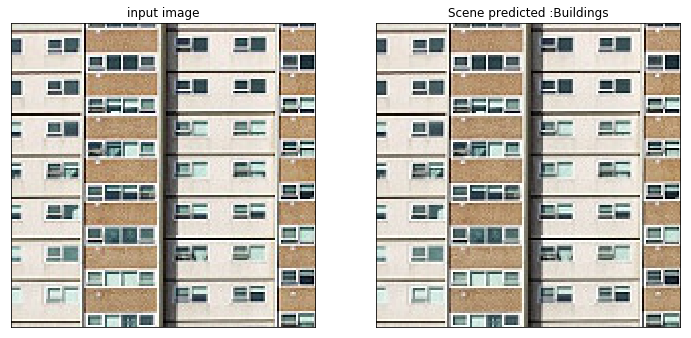

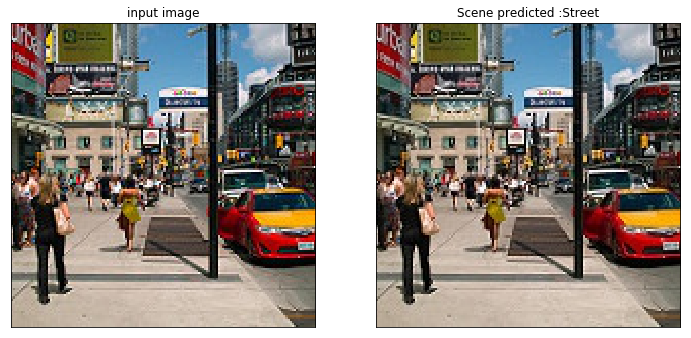

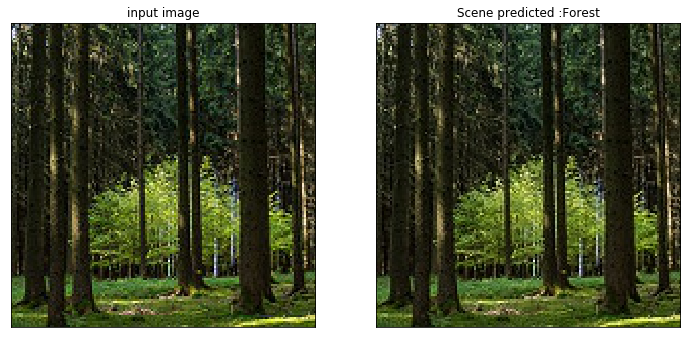

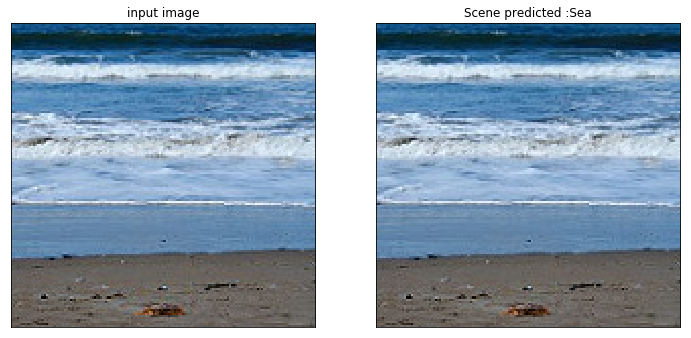

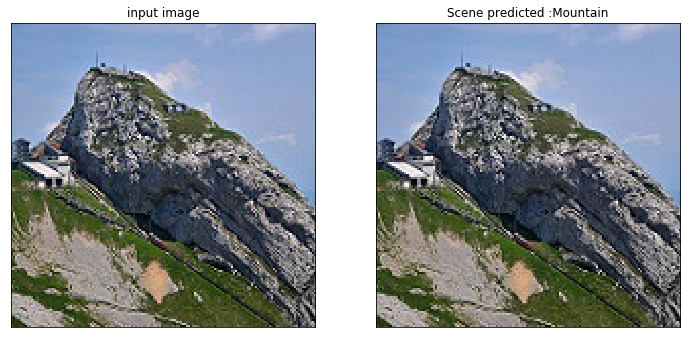

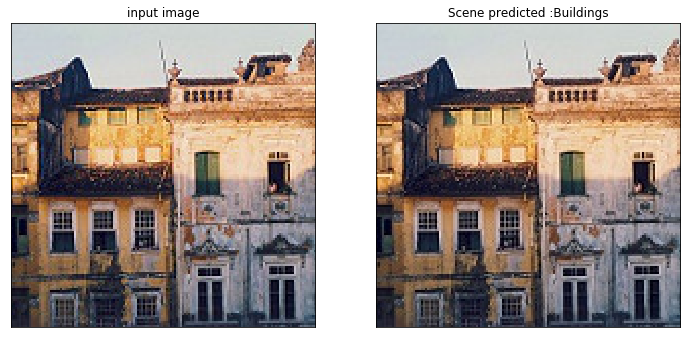

In [12]:
ip_img_folder = '../input/seg_pred/seg_pred/'
ip_img_files = ['222.jpg','121.jpg','88.jpg','398.jpg','839.jpg', '520.jpg']
scene_predicted = [scene_predict(os.path.join(ip_img_folder,img_file))for img_file in ip_img_files]

# COMPARISION

**CNN ACCURACY - 79 %**


**SVM ACCURACY - 64%**